In [1]:
import anndata as ad
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import seaborn as sns
import sklearn.metrics

sns.set()

In [2]:
results = pd.read_csv('../results/fewshot_cta.csv')
results.model = results.model.astype('str')
results

,acc_cell_type,f1_cell_type,dataset,n_cells,n_cell_types,model
0,0.720732,0.661574,HLCA,1,8,scDiff-LLM
1,0.709716,0.665675,HLCA,1,8,scDiff-LLM
2,0.702990,0.598423,HLCA,1,8,scDiff-Embedding
3,0.460909,0.417714,Brain,1,8,scDiff-LLM
4,0.529040,0.422955,Brain,1,8,scDiff-LLM
...,...,...,...,...,...,...
907,0.319514,0.285919,Immune,1,8,CellTypist
908,0.268622,0.207907,Immune,1,8,CellTypist
909,0.200798,0.153043,Immune,1,8,CellTypist
910,0.195757,0.148052,Immune,1,8,CellTypist


/tmp/ipykernel_2620357/2811031915.py:26: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


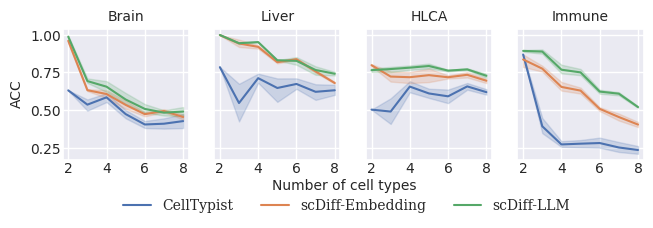

In [3]:
n = 1
metric = "acc"

fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, dpi=100, figsize=(7.5, 1.7))
datasets = ['Brain', 'Liver', 'HLCA', 'Immune']

for i in range(4):
    dataset = datasets[i]
    sub_results = results.query("dataset == @dataset & n_cells == @n").copy()  
    sub_results = sub_results.sort_values(["model", "n_cell_types"])
    
    legend = True if i == 2 else False
    sns.lineplot(data=sub_results, x="n_cell_types", y=f"{metric}_cell_type", hue="model", 
                 ax=axes[i], legend=legend)
    axes[i].title.set_text(f'{dataset}')
    axes[i].title.set_fontsize(10)
    axes[i].set(xlabel=None)
    axes[i].set(ylabel=None)
    axes[i].xaxis.get_major_locator().set_params(integer=True)
    axes[i].tick_params(labelsize=10, pad=-5)

fig.supxlabel('Number of cell types', y=-0.08, fontsize=10)
fig.supylabel(f"ACC", x=0.055, fontsize=10)  
axes[2].legend(frameon=False, loc='upper center', ncol=3, 
               bbox_to_anchor=(-0.15, -0.2),  prop = {'size':10, 'family': 'serif'})
plt.tight_layout()
plt.show()
# plt.savefig('one-shot_annotation.pdf', bbox_inches='tight')

/tmp/ipykernel_2620357/963866100.py:26: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


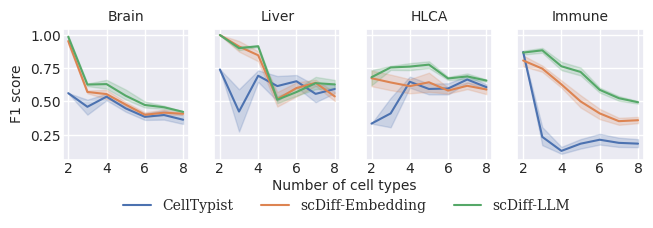

In [4]:
n = 1
metric = "f1"

fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, dpi=100, figsize=(7.5, 1.7))
datasets = ['Brain', 'Liver', 'HLCA', 'Immune']

for i in range(4):
    dataset = datasets[i]
    sub_results = results.query("dataset == @dataset & n_cells == @n").copy()  
    sub_results = sub_results.sort_values(["model", "n_cell_types"])
    
    legend = True if i == 2 else False
    sns.lineplot(data=sub_results, x="n_cell_types", y=f"{metric}_cell_type", hue="model", 
                 ax=axes[i], legend=legend)
    axes[i].title.set_text(f'{dataset}')
    axes[i].title.set_fontsize(10)
    axes[i].set(xlabel=None)
    axes[i].set(ylabel=None)
    axes[i].xaxis.get_major_locator().set_params(integer=True)
    axes[i].tick_params(labelsize=10, pad=-5)

fig.supxlabel('Number of cell types', y=-0.08, fontsize=10)
fig.supylabel(f"F1 score", x=0.055, fontsize=10)  
axes[2].legend(frameon=False, loc='upper center', ncol=3, 
               bbox_to_anchor=(-0.15, -0.2),  prop = {'size':10, 'family': 'serif'})
plt.tight_layout()
plt.show()
# plt.savefig('one-shot_annotation_f1.pdf', bbox_inches='tight')

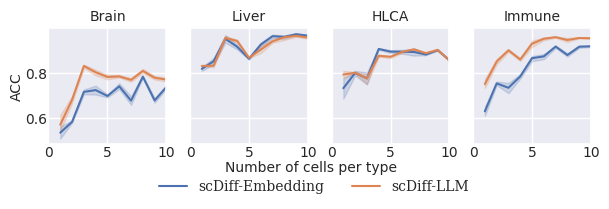

In [5]:
metric = "acc"
baseline = "CellTypist"

fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, dpi=100, figsize=(7, 1.5))
datasets = ['Brain', 'Liver', 'HLCA', 'Immune']

for i in range(4):
    dataset = datasets[i]
    sub_results = results.query("dataset == @dataset & n_cell_types == 5 & model != @baseline").copy()
    sub_results = sub_results.sort_values(["model", "n_cells"])
    
    legend = True if i == 2 else False
    sns.lineplot(data=sub_results, x="n_cells", y=f"{metric}_cell_type", hue="model", 
                 ax=axes[i], legend=legend)
    axes[i].title.set_text(f'{dataset}')
    axes[i].title.set_fontsize(10)
    axes[i].set(xlabel=None)
    axes[i].set(ylabel=None)
    axes[i].xaxis.get_major_locator().set_params(integer=True)
    axes[i].tick_params(labelsize=10, pad=-5)
    axes[i].set_xlim(0, 10)

fig.supxlabel('Number of cells per type', y=-0.09, fontsize=10)
fig.supylabel(f"ACC", x=0.07, fontsize=10)  
axes[2].legend(frameon=False, loc='upper center', ncol=3, 
               bbox_to_anchor=(-0.15, -0.2),  prop = {'size':10, 'family': 'serif'})
# plt.tight_layout()
plt.show()
# plt.savefig(f'grid_on_top5.pdf', bbox_inches='tight')

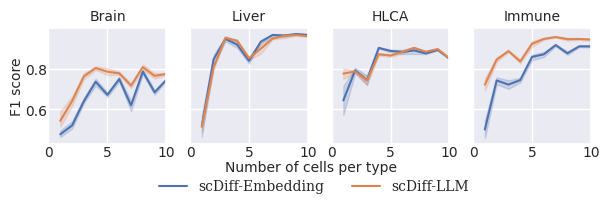

In [6]:
metric = "f1"
baseline = "CellTypist"

fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, dpi=100, figsize=(7, 1.5))
datasets = ['Brain', 'Liver', 'HLCA', 'Immune']

for i in range(4):
    dataset = datasets[i]
    sub_results = results.query("dataset == @dataset & n_cell_types == 5 & model != @baseline").copy()  
    sub_results = sub_results.sort_values(["model", "n_cells"])
    
    legend = True if i == 2 else False
    sns.lineplot(data=sub_results, x="n_cells", y=f"{metric}_cell_type", hue="model", 
                 ax=axes[i], legend=legend)
    axes[i].title.set_text(f'{dataset}')
    axes[i].title.set_fontsize(10)
    axes[i].set(xlabel=None)
    axes[i].set(ylabel=None)
    # axes[i].set_box_aspect(1)
    axes[i].xaxis.get_major_locator().set_params(integer=True)
    axes[i].tick_params(labelsize=10, pad=-5)
    axes[i].set_xlim(0, 10)

fig.supxlabel('Number of cells per type', y=-0.09, fontsize=10)
# fig.supylabel(f"{metric} score")  
fig.supylabel(f"F1 score", x=0.07, fontsize=10)  
# fig.suptitle(f'One-shot cell type annotation', y=1.05)
axes[2].legend(frameon=False, loc='upper center', ncol=3, 
               bbox_to_anchor=(-0.15, -0.2),  prop = {'size':10, 'family': 'serif'})
# plt.tight_layout()
plt.show()
# plt.savefig(f'grid_on_top5_f1.pdf', bbox_inches='tight')